# Principal Component Analysis (PCA) - Cancer Dataset

PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data.

We are going to work with a cancer data set that has many features that we can use PCA to reduce.

Let's start with importing libraries

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will load the data from sklearn library

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

Let's take a look at what it is in the dataset

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Let's create our X and y datasets

In [7]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

y= cancer["target"]

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We have 30 attributes, if we wanted to plot these, we can create scatterplots or pair plots for each pair of attributes but that would make a lot of graphs

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

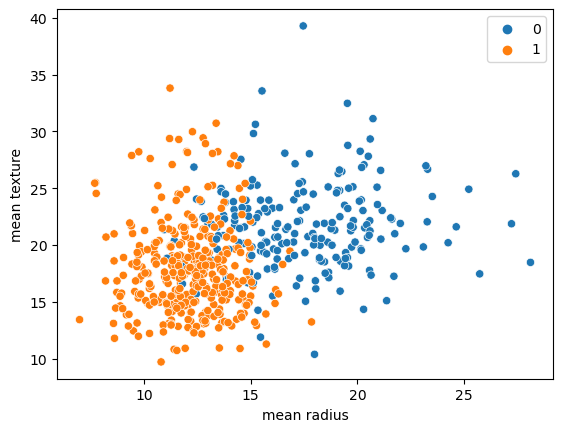

In [10]:
sns.scatterplot(x = "mean radius", y="mean texture", data=X, hue=y)

## PCA Visualization

Since it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we said as the first step of PCA, we need to scale our data 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=None)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Let's take a look at how much variance our components explain

In [15]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

Let's plot the cumulative sum of the explained variance

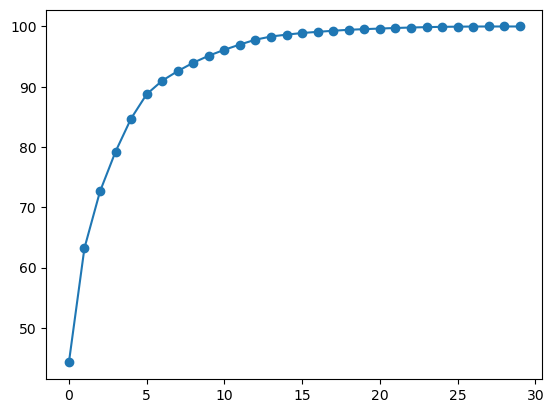

In [16]:
var1=np.cumsum(explained_variance*100)
plt.plot(var1,  marker='o')

In [17]:
scaled_data.shape

(569, 30)

In [18]:
x_pca.shape

(569, 30)

In [19]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

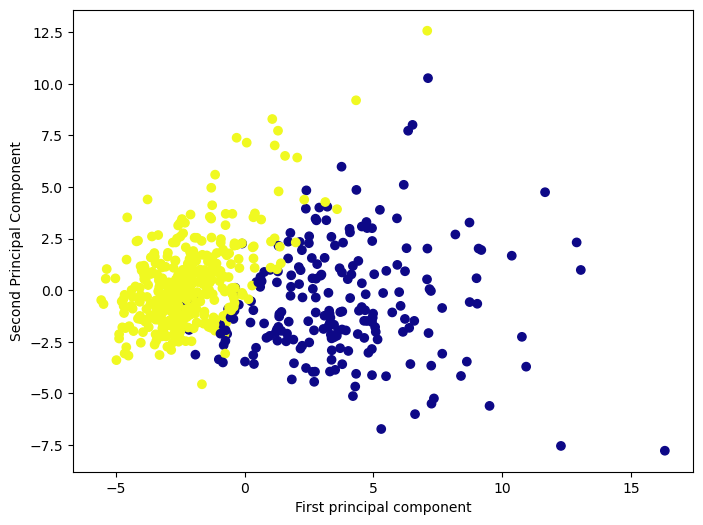

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 



In [21]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [22]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

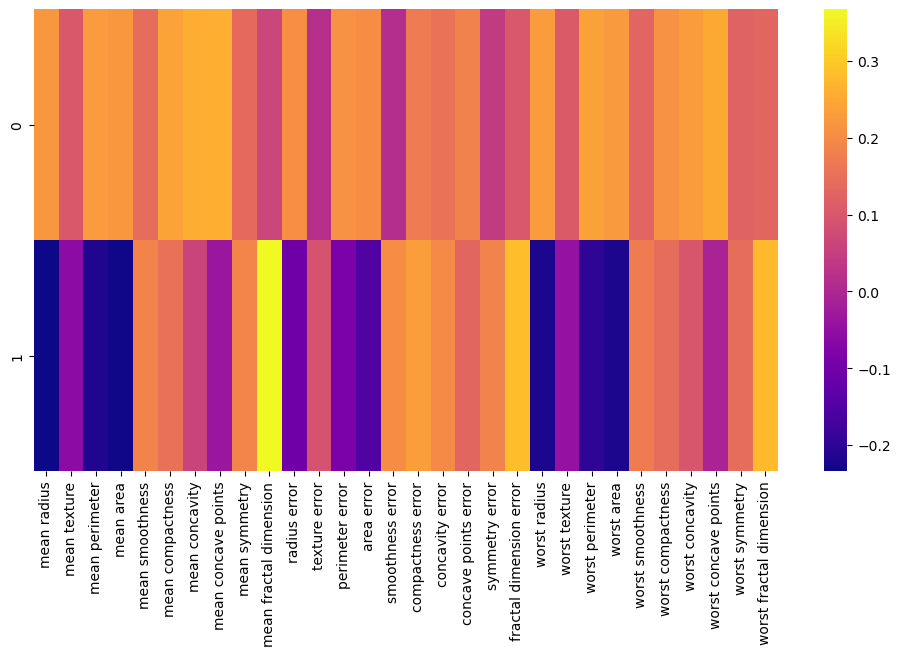

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.